In [2]:
import cv2
import imutils
import matplotlib.pyplot as plt

width=538, height=412, depth=3


-1

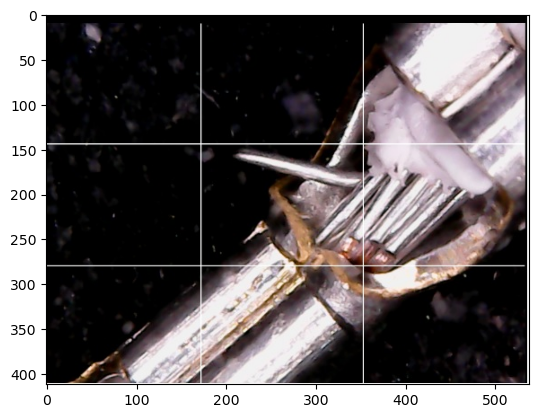

In [3]:
image = cv2.imread("harness.jpg")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
inline_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(inline_image)
cv2.waitKey(0)

### 이번 예제에서는 흑백 gray 로 변환하였으나 inline 출력이 이상하게 나왔음
### #처리된 부분을 살려서 실행하면 바탕화면에 정상적으로 흑백 이미지가 출력됨

In [4]:
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('harness',gray)
gray = cv2.GaussianBlur(gray, (7,7),cv2.BORDER_DEFAULT) # 커늘 크기를 변경해보자 93,3),(5,5),(7,7)
cv2.imshow('Blur', gray)
edged = cv2.Canny(gray, 30, 50)
cv2.imshow('Edges',edged)
thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]
cv2.imshow('Threshold', thresh)
cv2.waitKey(0)

-1

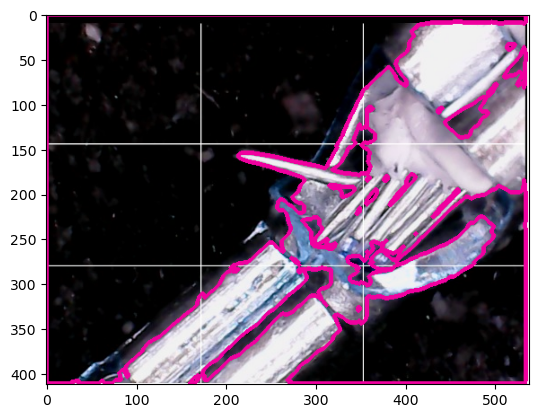

In [6]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	plt.imshow(output)
	cv2.waitKey(0)

-1

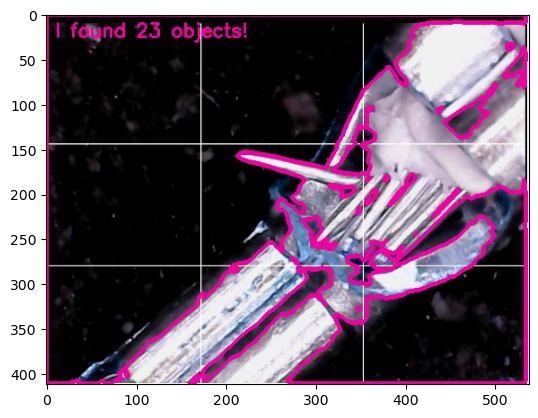

In [7]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
plt.imshow(output)
cv2.waitKey(0)